# Chapter 5 - Exercise 3: Phân tích dữ liệu Movies

#### Dữ liệu được lấy từ MovieLens website. 
#### Download the Dataset
Theo link: 
* **Data Source:** MovieLens web site (filename: ml-latest-small.zip)
* **Location:** https://grouplens.org/datasets/movielens/latest/

### Part 1: Đọc dữ liệu & Data Structures

##### Trong ml-latest-small.zip bao gồm 3 file CSV sau:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp* : Chứa dữ liệu về các xếp hạng của các bộ phim, mỗi dòng biểu thị một xếp hạng của một phim bởi một người dùng.
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp* : chứa thông tin về các Tag mà người dùng gắn vào cho phim, mỗi dòng biểu thị cho 1 tag của một người dùng cho một phim 
* **movies.csv :** *movieId*, *title*, *genres* : chứa thông tin về các bộ phim, mỗi dòng biểu thị thông tin của 1 bộ phim <br>
##### Sử dụng  pd.read_csv() để đọc dữ liệu

In [50]:
import pandas as pd
import numpy as np

In [51]:
# Câu 1: Đọc file movies.csv => đưa dữ liệu vào movies
movies = pd.read_csv('./movies_data/movies.csv', sep=',')
# Cho biết kiểu dữ liệu (type) của movies
print(type(movies))
# Cho biết kích thước (shape) của movies
print(movies.shape)
# Hiển thị 5 dòng dữ liệu đầu tiên (head) của movies
movies.head()

<class 'pandas.core.frame.DataFrame'>
(9125, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [52]:
# Hiển thị 5 dòng dữ liệu cuối (tail) của movies
movies.tail()

,movieId,title,genres
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy
9124,164979,"Women of '69, Unboxed",Documentary


In [53]:
# Cho biết kiểu dữ liệu (dtype) của các cột của movies
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [54]:
# Xem thông tin (info) của movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9124 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


In [55]:
# Câu 2: Đọc file tags.csv => đưa dữ liệu vào tags
tags = pd.read_csv('./movies_data/tags.csv', sep=',', parse_dates=['timestamp'])
# Cho biết kiểu dữ liệu (type) của tags
print(type(tags))
# Cho biết kích thước (shape) của tags
print(tags.shape)
# Hiển thị 5 dòng đầu tiên (head) của tags
tags.head()

<class 'pandas.core.frame.DataFrame'>
(1296, 4)


,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [56]:
# Hiển thị 5 dòng dữ liệu cuối (tail) của tags
tags.tail()

,userId,movieId,tag,timestamp
1291,660,135518,meaning of life,1436680885
1292,660,135518,philosophical,1436680885
1293,660,135518,sci-fi,1436680885
1294,663,260,action,1438398078
1295,663,260,Syfy,1438398050


In [57]:
# Cho biết kiểu dữ liệu (dtype) của các cột của tags
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

In [58]:
# Xem thông tin (info) của tags
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     1296 non-null   int64 
 1   movieId    1296 non-null   int64 
 2   tag        1296 non-null   object
 3   timestamp  1295 non-null   object
dtypes: int64(2), object(2)
memory usage: 40.6+ KB


In [59]:
# Câu 3: Đọc file ratings.csv => đưa dữ liệu vào ratings
ratings = pd.read_csv('./movies_data/ratings.csv', sep=',', parse_dates=['timestamp'])
# Cho biết kiểu dữ liệu (type) của ratings
print(type(ratings))
# Cho biết kích thước của ratings
print(ratings.shape)
# Hiển thị 5 dòng đầu tiên (head) của ratings
ratings.head()

<class 'pandas.core.frame.DataFrame'>
(100004, 4)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [60]:
# Hiển thị 5 dòng dữ liệu cuối (tail) của ratings
ratings.tail()

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [61]:
# Cho biết kiểu dữ liệu (dtype) của các cột của ratings
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp     object
dtype: object

In [62]:
# Xem thông tin (info) của ratings
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


### Part 2: Xử lý dữ liệu bị thiếu/ không hợp lệ

In [63]:
# Câu 1: Cho biết trong movies có dữ liệu null hay không? Nếu có loại bỏ dòng có dữ liệu null.
movies.isnull().any()

movieId    False
title      False
genres      True
dtype: bool

In [64]:
# Loại bỏ dòng có dữ liệu null
movies.dropna(subset=['genres'], axis=0, inplace=True)
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [65]:
# Câu 2: Cho biết trong ratings có dữ liệu null hay không? Nếu có loại bỏ dòng có dữ liệu null.
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

Trong ratings không có giá trị NULL.

In [66]:
# Câu 3: Cho biết trong tags có dữ liệu null hay không? Nếu có loại bỏ dòng có dữ liệu null. 
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp     True
dtype: bool

In [67]:
# Loại bỏ dòng có dữ liệu null
tags.dropna(subset=['timestamp'], axis=0, inplace=True)

In [68]:
# Câu 4: Kiểm tra xem có dữ liệu rating nào không hợp lệ hay không ('rating' > 5 hoặc 'rating' < 0) ?
# Nếu có, hãy thay bằng giá trị xuất hiện nhiều nhất
filter_rating = np.logical_or(ratings['rating'] > 5, ratings['rating'] < 0)
filter_rating.any()

True

In [69]:
# Thay bằng giá trị xuất hiện nhiều nhất
ratings.loc[filter_rating] = ratings['rating'].mode()[0]

### Part 3: Gộp DataFrame

In [70]:
# Câu 1: Tạo movies_tags bằng cách gộp dữ liệu của movies và tags theo cột chung là 'moviedId'.
movies_tags = movies.merge(tags, on='movieId', how='inner')
# Hiển thị 5 dòng đầu của movies_tags
movies_tags.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,501,Pixar,1292956344
1,5,Father of the Bride Part II (1995),Comedy,431,steve martin,1140455432
2,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,biblical,1444534976
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,crime,1444534982
4,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,dark,1444534994


In [71]:
# Câu 2: Tạo movies_ratings bằng cách gộp dữ liệu của movies và ratings theo cột chung là 'moviedId'.
movies_ratings = movies.merge(ratings, on='movieId', how='inner')
# Hiển thị 5 dòng đầu của movies_ratings
movies_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,855190091


### Part 4: Lọc dữ liệu theo yêu cầu

In [72]:
# Câu 1: Tạo dataframe tag_counts cho biết với mỗi tag là có bao nhiêu film chứa giá trị 'tag' đó 
# gợi ý: dùng tags['tag'].value_counts() 
tag_counts = tags['tag'].value_counts().to_frame()
# Hiển thị 10 dòng đầu của tag_counts
tag_counts.head(10)

,tag
getdvd,33
Ei muista,29
tivo,26
toplist07,26
toplist11,20
tcm,20
toplist12,20
toplist15,19
toplist08,19
toplist10,18


In [75]:
# Câu 2: Tạo is_highly_rated theo điều kiện: có 'rating' >= 4.0 của dataframe ratings 
is_highly_rated = ratings['rating'] >= 4
# Hiển thị 5 dòng dữ liệu đầu của is_highly_rated
is_highly_rated.head()

0    False
1    False
2    False
3    False
4     True
Name: rating, dtype: bool

In [76]:
# Liệt kê các phim thỏa is_highly_rated
ratings[is_highly_rated][['movieId','rating']]

,movieId,rating
4,1172.0,4.0
12,1953.0,4.0
13,2105.0,4.0
20,10.0,4.0
21,17.0,5.0
...,...,...
99995,5989.0,4.0
99996,5991.0,4.5
99997,5995.0,4.0
100000,6269.0,4.0


In [77]:
# Câu 3: Tạo is_animation theo điều kiện trong cột genres của movies có chứa chuỗi 'Animation'
is_animation = movies['genres'].str.contains('Animation')
# Hiển thị 5 dòng dữ liệu đầu của is_animation
is_animation.head()

0     True
1    False
2    False
3    False
4    False
Name: genres, dtype: bool

In [78]:
# Liệt kê các phim thỏa is_animation
movies[is_animation]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
46,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
211,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
216,244,Gumby: The Movie (1995),Animation|Children
...,...,...,...
9070,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy
9079,156025,Ice Age: The Great Egg-Scapade (2016),Adventure|Animation|Children|Comedy
9085,157296,Finding Dory (2016),Adventure|Animation|Comedy
9108,160718,Piper (2016),Animation


In [79]:
# Câu 4: Tạo movie_genres từ cột 'genres' bằng cách tách cột 'genres' dựa vào ký tự '|'
movie_genres = movies['genres'].str.split('|', expand=True)
# Hiển thị 10 dòng cuối của movie_genres 
movie_genres.tail(10)

,0,1,2,3,4,5,6,7,8,9
9115,Drama,Horror,Thriller,None,None,None,None,None,None,None
9116,Action,Adventure,Horror,Sci-Fi,None,None,None,None,None,None
9117,Drama,None,None,None,None,None,None,None,None,None
9118,Drama,None,None,None,None,None,None,None,None,None
9119,Romance,Thriller,None,None,None,None,None,None,None,None
9120,Adventure,Drama,Romance,None,None,None,None,None,None,None
9121,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None,None,None
9122,Documentary,None,None,None,None,None,None,None,None,None
9123,Comedy,None,None,None,None,None,None,None,None,None
9124,Documentary,None,None,None,None,None,None,None,None,None


In [80]:
# Câu 5: Thêm cột mới cho movie_genres có tên là 'isComedy', 
# giá trị là True nếu trong movies['genres'] có chứa chuỗi 'Comedy', ngược lại là False
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')
# Hiển thị 10 dòng đầu của movie_genres
movie_genres.head(10)

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


In [81]:
# Câu 6: Thêm cột mới cho movies có tên là 'year' với year được lấy ra từ cột 'title'
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
# Hiển thị 5 dòng dữ liệu đầu của movies
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### Part 5: Thống kê dữ liệu

In [82]:
# Câu 1: Thực hiện thống kê chung dữ liệu ratings
ratings.describe()

,userId,movieId,rating
count,100004.000000,100004.000000,100004.000000
mean,347.011330,12548.660904,3.543608
std,195.163803,26369.200592,1.058064
min,1.000000,1.000000,0.500000
25%,182.000000,1028.000000,3.000000
50%,367.000000,2406.500000,4.000000
75%,520.000000,5418.000000,4.000000
max,671.000000,163949.000000,5.000000


In [83]:
# Câu 2: In giá trị trung bình, giá trị lớn nhất, giá trị nhỏ nhất, 
#        độ lệch chuẩn, giá trị có tuần suất xuất hiện nhiều nhất của cột 'rating'
print('Giá trị trung bình của ratings: ', ratings['rating'].mean())
print('Giá trị nhỏ nhất của ratings: ', ratings['rating'].min())
print('Giá trị lớn nhất của ratings: ', ratings['rating'].max())
print('Độ lệch chuẩn của ratings: ', ratings['rating'].std())
print('Giá trị có tần suất xuất hiện nhiều nhất của ratings: ', ratings['rating'].mode()[0])

Giá trị trung bình của ratings:  3.543608255669773
Giá trị nhỏ nhất của ratings:  0.5
Giá trị lớn nhất của ratings:  5.0
Độ lệch chuẩn của ratings:  1.0580641091070389
Giá trị có tần suất xuất hiện nhiều nhất của ratings:  4.0


In [33]:
# Câu 3: Thống kê đếm số lượng phim theo ‘rating’ (Count of films). Xem kết quả. 
count_of_films = movies_ratings[['movieId','rating']].groupby(['rating'], as_index = False).count()
count_of_films.rename(columns={"movieId":"Count of films"}, inplace = True)
# Xem kết quả
count_of_films

,rating,Count of films
0,0.5,1101
1,1.0,3326
2,1.5,1687
3,2.0,7268
4,2.5,4449
5,3.0,20058
6,3.5,10535
7,4.0,28743
8,4.5,7723
9,5.0,15094


In [84]:
# Câu 4: Đếm số lượng rating (Total ratings) theo phim, và lưu vào biến 'movie_count'
movie_count = movies_ratings[['movieId','title','rating','genres']].groupby(['movieId','title','genres'], as_index=False).count()
movie_count.rename(columns={"rating":"Total ratings"}, inplace=True)
# Hiển thị 5 dòng dữ liệu đầu của total_ratings
movie_count.head()

,movieId,title,genres,Total ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,247
1,2,Jumanji (1995),Adventure|Children|Fantasy,107
2,3,Grumpier Old Men (1995),Comedy|Romance,59
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,14
4,5,Father of the Bride Part II (1995),Comedy,56


In [85]:
# Câu 5: Tính rating trung bình (Average ratings) theo mỗi phim, và lưu vào biến avg_ratings
avg_ratings = movies_ratings[['movieId','title','rating','genres']].groupby(['movieId','title','genres'], as_index=False).mean()
avg_ratings.rename(columns={"rating":"Average ratings"}, inplace=True)
# Hiển thị 5 dòng dữ liệu đầu của avg_ratings
avg_ratings.head()

,movieId,title,genres,Average ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.872470
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.401869
2,3,Grumpier Old Men (1995),Comedy|Romance,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.500000
4,5,Father of the Bride Part II (1995),Comedy,3.267857


In [86]:
# Câu 6: Hiển thị rating trung bình của các phim là ‘Comedy’, 
# chỉ in ra 5 dòng dữ liệu đầu của dataframe kết quả
is_comedy = avg_ratings['genres'].str.contains('Comedy')
avg_ratings[is_comedy].head()

,movieId,title,genres,Average ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.872470
2,3,Grumpier Old Men (1995),Comedy|Romance,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.500000
4,5,Father of the Bride Part II (1995),Comedy,3.267857
6,7,Sabrina (1995),Comedy|Romance,3.283019


In [87]:
# Câu 7: Hiển thị rating trung bình của các phim là ‘Comedy’ và có 'rating' >= 4, 
# chỉ in ra 5 dòng dữ liệu cuối của dataframe kết quả.
rating4 = avg_ratings['Average ratings'] >= 4.0
avg_ratings[rating4 & is_comedy][-5:]

,movieId,title,genres,Average ratings
9018,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,4.0
9022,153584,The Last Days of Emma Blank (2009),Comedy,5.0
9026,156025,Ice Age: The Great Egg-Scapade (2016),Adventure|Animation|Children|Comedy,5.0
9036,158314,Daniel Tosh: Completely Serious (2007),Comedy,4.5
9051,160567,Mike & Dave Need Wedding Dates (2016),Comedy,4.0


In [88]:
# Câu 8: Tính trung bình rating theo year, và lưu vào biến yearly_average
joined = movies.merge(ratings, how = 'inner')
yearly_average = joined[['year','rating']].groupby('year', as_index = False).mean()
# Cho biết shape của yearly_average
print(yearly_average.shape)
# Hiển thị 5 dòng dữ liệu đầu của yearly_average
yearly_average.head()

(105, 2)


,year,rating
0,1902,4.333333
1,1915,3.000000
2,1916,3.500000
3,1917,4.250000
4,1918,4.250000


In [89]:
# Câu 9: Sắp xếp tăng dần yearly_average
yearly_average_asc = yearly_average.sort_values(by ='year', ascending = True)
# Hiển thị 20 dòng dữ liệu đầu của yearly_average_asc
yearly_average_asc.head(20)

,year,rating
0,1902,4.333333
1,1915,3.000000
2,1916,3.500000
3,1917,4.250000
4,1918,4.250000
5,1919,3.000000
6,1920,3.700000
7,1921,4.416667
8,1922,3.803571
9,1923,4.166667


### Part 6: Parsing Timestamps

In [40]:
# Câu 1: Tạo cột parsed_time trong tags bằng cách đổi thời gian sang định dạng DateTime 
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
# Cho biết kiểu dữ liệu của cột parsed_time
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [41]:
# Hiển thị 5 dòng dữ liệu đầu của tags
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30
1,15,1955,dentist,1193435061,2007-10-26 21:44:21
2,15,7478,Cambodia,1170560997,2007-02-04 03:49:57
3,15,32892,Russian,1170626366,2007-02-04 21:59:26
4,15,34162,forgettable,1141391765,2006-03-03 13:16:05


In [42]:
# Câu 2: Tạo selected_rows chứa các dòng có tags['parsed_time'] > '2015-02-01'. 
t = tags['parsed_time'] > '2015-02-01'
selected_rows = tags[t]
selected_rows.head()

,userId,movieId,tag,timestamp,parsed_time
8,15,100365,activist,1425876220,2015-03-09 04:43:40
9,15,100365,documentary,1425876220,2015-03-09 04:43:40
10,15,100365,uganda,1425876220,2015-03-09 04:43:40
15,73,107999,action,1430799184,2015-05-05 04:13:04
16,73,107999,anime,1430799184,2015-05-05 04:13:04


In [43]:
# Câu 3: Sắp xếp dữ liệu tags tăng dần theo cột parsed_time
# Hiển thị 10 dòng dữ liệu đầu của tags
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
338,353,35836,dumb,1137217440,2006-01-14 05:44:00
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30
232,294,36401,fairy tales,1138983064,2006-02-03 16:11:04
229,294,6754,vampire,1138983469,2006-02-03 16:17:49
333,353,4721,As historicaly correct as Germany winning WW2,1140389056,2006-02-19 22:44:16
334,353,4721,but still a fun movie.,1140389056,2006-02-19 22:44:16
335,353,7376,"The Rocks ""finest"" work need I say more?",1140389511,2006-02-19 22:51:51
336,353,31221,Try not to mistake this for an episode of Alias,1140389595,2006-02-19 22:53:15
230,294,8865,1940's feel,1140395930,2006-02-20 00:38:50
231,294,8865,unique look,1140395930,2006-02-20 00:38:50


### Part 7: Trực quan hóa dữ liệu

<AxesSubplot:ylabel='Frequency'>

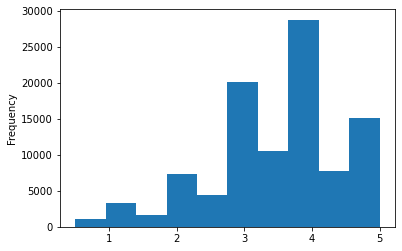

In [44]:
# Câu 1: Vẽ biểu đồ histogram cột 'rating' của ratings
ratings['rating'].plot.hist()

<AxesSubplot:>

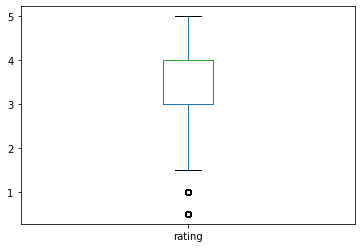

In [45]:
# Câu 2: Vẽ biểu đồ box plot cột 'rating' của ratings
ratings['rating'].plot.box()

c:\users\ntd20\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year'>

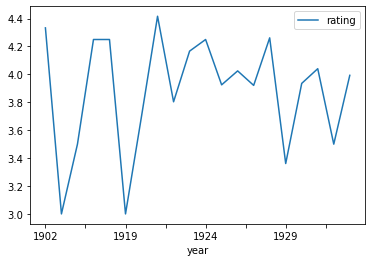

In [46]:
# Câu 3: Dựa vào Câu 9 - Part 5, Vẽ biểu đồ plot() cho 20 dòng đầu của yearly_average sau khi sắp tăng dần
yearly_average_asc.head(20).plot(x='year', y='rating')

#### Quan sát biểu đồ trên, nhận xét:
 - Những năm nào có rating đặc biệt cao/thấp?